In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout

# 데이터 로드 및 분포 확인

raw_df = pd.read_csv('/content/drive/MyDrive/Git/tensorflow2-colab-ex/resources/csv/005930.KS_3MA_5MA.csv')
raw_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,3MA,5MA
0,2000-01-04,6000.0,6110.0,5660.0,6110.0,4740.119629,74195000.0,NaN,NaN
1,2000-01-05,5800.0,6060.0,5520.0,5580.0,4328.947754,74680000.0,NaN,NaN
2,2000-01-06,5750.0,5780.0,5580.0,5620.0,4359.979492,54390000.0,4476.348958,NaN
3,2000-01-07,5560.0,5670.0,5360.0,5540.0,4297.916992,40305000.0,4328.948079,NaN
4,2000-01-10,5600.0,5770.0,5580.0,5770.0,4476.349121,46880000.0,4378.081868,4440.662598


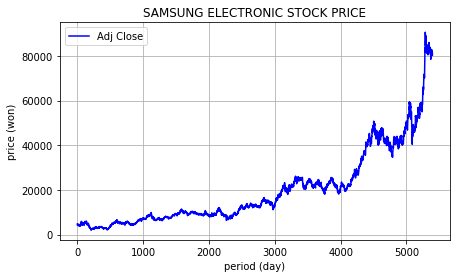

In [2]:
# 데이터 로드 및 분포 확인

plt.figure(figsize=(7,4))

plt.title('SAMSUNG ELECTRONIC STOCK PRICE')
plt.ylabel('price (won)')
plt.xlabel('period (day)')
plt.grid()

plt.plot(raw_df['Adj Close'], label='Adj Close', color='b')
plt.legend(loc='best')

plt.show()

In [3]:
# 데이터 전처리 - Outlier 확인

raw_df.describe()

,Open,High,Low,Close,Adj Close,Volume,3MA,5MA
count,5389.000000,5389.000000,5389.000000,5389.000000,5389.000000,5.389000e+03,5393.000000,5391.000000
mean,22801.887178,23043.991464,22559.285582,22801.909445,19920.044863,2.207838e+07,19934.224878,19925.585966
std,17736.201238,17906.827402,17572.109940,17733.296811,17322.636387,1.564053e+07,17313.297249,17292.697383
min,2540.000000,2760.000000,2420.000000,2730.000000,2117.926025,0.000000e+00,2164.473877,2179.989746
25%,9880.000000,9990.000000,9800.000000,9900.000000,7726.937988,1.185265e+07,7726.939453,7709.871631
50%,15760.000000,15940.000000,15560.000000,15800.000000,12808.596680,1.803935e+07,12802.806970,12809.314840
75%,29280.000000,29560.000000,29000.000000,29280.000000,24566.556640,2.771475e+07,24558.166020,24555.269140
max,90300.000000,96800.000000,89500.000000,91000.000000,90597.414060,1.642150e+08,90033.252600,89562.014060


In [4]:
# 데이터 전처리 - Missing Value 확인

raw_df.isnull().sum()

Date         0
Open         6
High         6
Low          6
Close        6
Adj Close    6
Volume       6
3MA          2
5MA          4
dtype: int64

In [5]:
# Open column 의 Missing Value 세부 정보 확인

raw_df.loc[raw_df['Open'].isna()]

,Date,Open,High,Low,Close,Adj Close,Volume,3MA,5MA
1304,2005-01-03,NaN,NaN,NaN,NaN,NaN,NaN,6989.931152,6910.412353
4513,2017-11-16,NaN,NaN,NaN,NaN,NaN,NaN,49382.673830,49719.997070
4518,2017-11-23,NaN,NaN,NaN,NaN,NaN,NaN,49373.792970,49324.969730
4542,2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN,44927.763670,44190.302730
4755,2018-11-15,NaN,NaN,NaN,NaN,NaN,NaN,40569.835940,40775.886720
5000,2019-11-14,NaN,NaN,NaN,NaN,NaN,NaN,49695.419920,49364.432620


In [6]:
# 데이터 전처리 - Outlier 및 Missing Value 처리

# Volume 값 0 을 NaN 으로 모두 대체 (replace)
raw_df['Volume'] = raw_df['Volume'].replace(0, np.nan)

# 각 column 의 0 개수 확인
for col in raw_df.columns:
  missing_rows = raw_df.loc[raw_df[col]==0].shape[0]
  print(col + ': ' + str(missing_rows))

Date: 0
Open: 0
High: 0
Low: 0
Close: 0
Adj Close: 0
Volume: 0
3MA: 0
5MA: 0


In [7]:
# Missing Value 확인

raw_df.isnull().sum()

Date           0
Open           6
High           6
Low            6
Close          6
Adj Close      6
Volume       122
3MA            2
5MA            4
dtype: int64

In [8]:
# 모든 Missing Value 삭제 후 확인

raw_df = raw_df.dropna()
raw_df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
3MA          0
5MA          0
dtype: int64

In [9]:
# 데이터 전처리 - 정규화

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scale_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', '3MA', '5MA', 'Volume'] # 정규화 대상 column 정의

scaled_df = scaler.fit_transform(raw_df[scale_cols]) # 정규화 수행
print(type(scaled_df), '\n') # 리턴 값은 넘파이

scaled_df = pd.DataFrame(scaled_df, columns=scale_cols) # 정규화된 새로운 DataFrame 생성
print(scaled_df)

<class 'numpy.ndarray'> 

          Open      High       Low     Close  Adj Close       3MA       5MA  \
0     0.034868  0.032008  0.036288  0.034440   0.026655  0.025192  0.025698   
1     0.037375  0.035517  0.038470  0.034440   0.026655  0.025634  0.025094   
2     0.034982  0.031689  0.036518  0.033873   0.026217  0.026163  0.025343   
3     0.034868  0.031689  0.036059  0.033760   0.026129  0.025987  0.025503   
4     0.036235  0.033177  0.037437  0.035120   0.027181  0.026163  0.026018   
...        ...       ...       ...       ...        ...       ...       ...   
5264  0.891750  0.830923  0.896647  0.881047   0.885878  0.895299  0.903144   
5265  0.892890  0.834113  0.897795  0.885578   0.890399  0.894920  0.900854   
5266  0.899727  0.841557  0.903537  0.895774   0.900571  0.897955  0.902457   
5267  0.895169  0.835177  0.898944  0.885578   0.890399  0.899472  0.902228   
5268  0.895169  0.833050  0.896647  0.881047   0.885878  0.897955  0.901083   

        Volume  
0     0.

In [10]:
# 데이터 전처리 - feature colume / label column 정의

feature_cols = ['3MA', '5MA', 'Adj Close'] # feature 정의 (입력데이터)
label_cols = ['Adj Close'] # label 정의 (정답데이터)

label_df = pd.DataFrame(scaled_df, columns=label_cols)
feature_df = pd.DataFrame(scaled_df, columns=feature_cols)

print(feature_df)
print(label_df)

# 딥러닝 학습을 위해 DataFrame => numpy 변환
label_np = label_df.to_numpy()
feature_np = feature_df.to_numpy()

           3MA       5MA  Adj Close
0     0.025192  0.025698   0.026655
1     0.025634  0.025094   0.026655
2     0.026163  0.025343   0.026217
3     0.025987  0.025503   0.026129
4     0.026163  0.026018   0.027181
...        ...       ...        ...
5264  0.895299  0.903144   0.885878
5265  0.894920  0.900854   0.890399
5266  0.897955  0.902457   0.900571
5267  0.899472  0.902228   0.890399
5268  0.897955  0.901083   0.885878

[5269 rows x 3 columns]
      Adj Close
0      0.026655
1      0.026655
2      0.026217
3      0.026129
4      0.027181
...         ...
5264   0.885878
5265   0.890399
5266   0.900571
5267   0.890399
5268   0.885878

[5269 rows x 1 columns]


In [11]:
# 데이터 생성 - 입력데이터 feature / 정답데이터 label

# 입력 파라미터 featurem label => numpy type
def make_sequence_dataset(feature, label, window_size):
  feature_list = [] # 생성될 feature list
  label_list = [] # 생성될 label list

  for i in range(len(feature)-window_size):
    feature_list.append(feature[i:i+window_size])
    label_list.append(label[i+window_size])

  return np.array(feature_list), np.array(label_list)

window_size = 40

X, Y = make_sequence_dataset(feature_np, label_np, window_size)

print(X.shape, Y.shape)

(5229, 40, 3) (5229, 1)


In [12]:
# 트레이닝 데이터 / 테스트 데이터 분리

split = -200

x_train = X[0:split]
y_train = Y[0:split]

x_test = X[split:]
y_test = Y[split:]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5029, 40, 3) (5029, 1)
(200, 40, 3) (200, 1)


In [13]:
# GRU 모델 구축

model = Sequential()

# GRU 계층에 tanh 를 활성화 함수로 가지는 노드 수 256개
model.add(GRU(256, activation='tanh', input_shape=x_train[0].shape)) # input shape=(40, 3)

model.add(Dense(1, activation='linear'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 256)               200448    
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 200,705
Trainable params: 200,705
Non-trainable params: 0
_________________________________________________________________


In [14]:
# 모델 컴파일 및 학습

from tensorflow.keras.callbacks import EarlyStopping

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

early_stop = EarlyStopping(monitor='val_loss', patience=5)

model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=16, callbacks=[early_stop])

Epoch 1/100
315/315 [==============================] - 9s 7ms/step - loss: 8.3399e-04 - mae: 0.0099 - val_loss: 4.2773e-04 - val_mae: 0.0145
Epoch 2/100
315/315 [==============================] - 2s 5ms/step - loss: 5.5608e-05 - mae: 0.0050 - val_loss: 4.4071e-04 - val_mae: 0.0148
Epoch 3/100
315/315 [==============================] - 2s 5ms/step - loss: 5.1534e-05 - mae: 0.0048 - val_loss: 4.4994e-04 - val_mae: 0.0154
Epoch 4/100
315/315 [==============================] - 2s 5ms/step - loss: 4.4262e-05 - mae: 0.0045 - val_loss: 3.1747e-04 - val_mae: 0.0125
Epoch 5/100
315/315 [==============================] - 2s 5ms/step - loss: 4.2452e-05 - mae: 0.0044 - val_loss: 3.2547e-04 - val_mae: 0.0128
Epoch 6/100
315/315 [==============================] - 2s 7ms/step - loss: 3.8416e-05 - mae: 0.0042 - val_loss: 3.2609e-04 - val_mae: 0.0130
Epoch 7/100
315/315 [==============================] - 2s 6ms/step - loss: 4.0145e-05 - mae: 0.0043 - val_loss: 2.2582e-04 - val_mae: 0.0107
Epoch 8/100
3

7/7 [==============================] - 0s 3ms/step


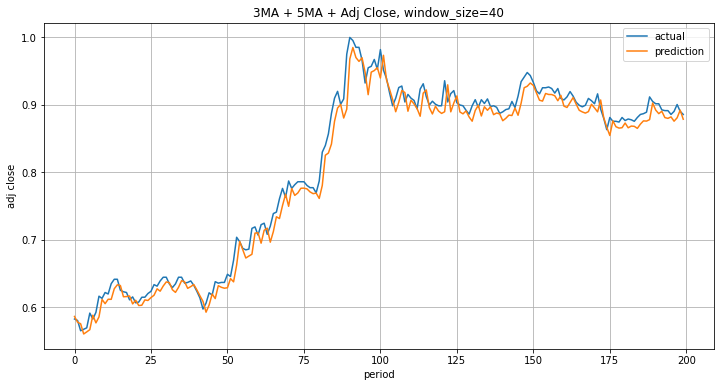

In [16]:
# 예측 결과 확인

pred = model.predict(x_test)

plt.figure(figsize=(12, 6))
plt.title('3MA + 5MA + Adj Close, window_size=40')
plt.ylabel('adj close')
plt.xlabel('period')
plt.plot(y_test, label = 'actual')
plt.plot(pred, label='prediction')
plt.grid()
plt.legend(loc='best')

plt.show()